In [1]:
"""
Use class GenerateVT to generate imposed sliprate-time history
"""
## Import standard librarys
import torch
import torchdiffeq
import pickle
import time
import torch.nn as nn
import scipy.optimize as opt
import numpy as np

from torchdiffeq import odeint
from xitorch.interpolate import Interp1D
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt


# Import local classes and functions
from MassFricParams import MassFricParams
from TimeSequenceGen import TimeSequenceGen
from AdjointMethod import AdjDerivs
from GradientDescent import GradDescent, objGradFunc
from plotSequences import plot_differences
from GenerateVT import GenerateVT

torch.set_default_dtype(torch.float)

/home/shengduo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Gradient descent on fixed $\alpha = [k, m, g]$ and $V$ 
# Set up the parameters
plotsName = "SimpleGen"
alpha0 = torch.tensor([50., 1., 9.8])
# VT = torch.tensor([[1., 1.], [0., 5.]])

# Generate VT series
VT_Vrange = torch.tensor([5., 15.])
VT_Trange = torch.tensor([0., 5.])
VT_NofTpts = 1000
VT_flag = "simple"
VT_nOfTerms = 10
VT_nOfFourierTerms = 10
plt_save_path = "./plots/VT_" + plotsName + ".png"

# For prescribed VT
VT_tts = torch.linspace(VT_Trange[0], VT_Trange[1], VT_nOfTerms)
VT_VVs = torch.rand(VT_nOfTerms) * (VT_Vrange[1] - VT_Vrange[0]) + VT_Vrange[0]

# Initialize VT_kwgs
VT_kwgs = {
    "nOfTerms" : VT_nOfTerms, 
    "nOfFourierTerms" : VT_nOfFourierTerms,
    "Trange" : VT_Trange, 
    "Vrange" : VT_Vrange, 
    "flag" : VT_flag, 
    "NofTpts" : VT_NofTpts, 
    "VV" : VT_VVs, 
    "tt" : VT_tts, 
    "plt_save_path" : plt_save_path, 
}

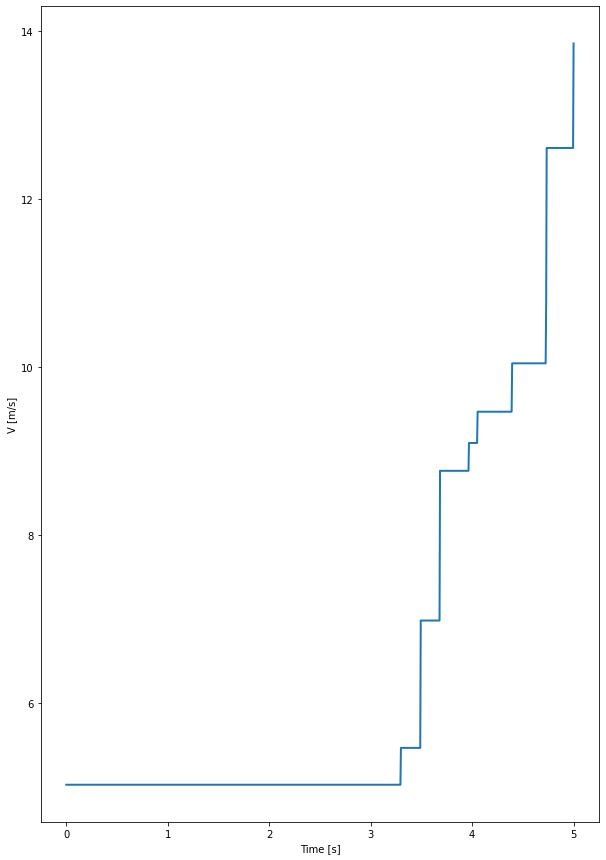

In [3]:
# Get the series
VT_instance = GenerateVT(VT_kwgs)
VT = VT_instance.VT

# Plot VT (optional)
VT_instance.plotVT()

In [4]:
VT

tensor([[5.0259e+00, 5.0259e+00, 5.0259e+00,  ..., 1.2607e+01, 1.2607e+01,
         1.3852e+01],
        [0.0000e+00, 5.0050e-03, 1.0010e-02,  ..., 4.9900e+00, 4.9950e+00,
         5.0000e+00]])

In [6]:
VT_Trange[0]

tensor(0.)

In [9]:
torch.sort(torch.rand(VT_kwgs['nOfTerms'])).values

tensor([0.0071, 0.1183, 0.2030, 0.3132, 0.3360, 0.3382, 0.3935, 0.5124, 0.5884,
        0.7318])